## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

metadata = pd.DataFrame(mouse_metadata)
results = pd.DataFrame(study_results)
df3 = pd.merge(metadata, results, on="Mouse ID")
df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
uf3 = df3.rename(columns={"Drug Regimen": "DrugRegimen", "Mouse ID" : "MouseID"})
uf3

,MouseID,DrugRegimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
pip = uf3["MouseID"].value_counts()
pip

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: MouseID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. df3
two_mouse = uf3.loc[uf3.MouseID=='g989']
two_mouse

,MouseID,DrugRegimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
dropedpip = pip.drop(['g989'])
dropedpip

k403    10
j365    10
j984    10
k210    10
k382    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: MouseID, Length: 248, dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unf_alt = uf3.set_index("MouseID")
unf_alt

,DrugRegimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
unf_clean = unf_alt.drop(index=('g989'))
unf_clean

,DrugRegimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [8]:
# Checking the number of mice in the clean DataFrame.
dropedpip.count()

248

## Summary Statistics (Done)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
fig = unf_clean.groupby("DrugRegimen")
meanfig = fig.mean()
avg_tumor = meanfig["Tumor Volume (mm3)"]

medfig = fig.median()
med_tumor = medfig["Tumor Volume (mm3)"]

varfig = fig.var()
var_tumor = varfig["Tumor Volume (mm3)"]

stdfig = fig.std()
std_tumor = stdfig["Tumor Volume (mm3)"]

semfig = fig.sem()
sem_tumor = semfig["Tumor Volume (mm3)"]

summary_data = pd.DataFrame({"mean" : avg_tumor,
              "median" : med_tumor,
              "variance" : var_tumor,
              "standard deviation" : std_tumor,
              "sem" : sem_tumor 
})
summary_data


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,mean,median,variance,standard deviation,sem
DrugRegimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
unf_clean.groupby('DrugRegimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std','sem'])

,mean,median,var,std,sem
DrugRegimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts (Done)

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barli = unf_clean.groupby(["DrugRegimen"])
gather3 = barli["Timepoint"].count()
frame3 = pd.DataFrame(gather3)
sortframe3 = frame3.sort_values(by=['Timepoint'], ascending=False)
sortframe3

,Timepoint
DrugRegimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


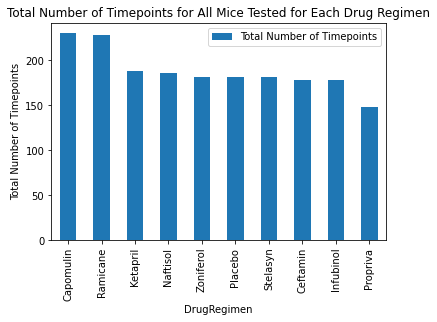

In [12]:
sortframe3.plot(kind="bar", title = "Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.legend(["Total Number of Timepoints"])
plt.show()

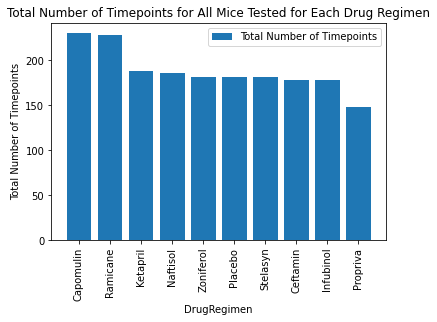

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(sortframe3.index, sortframe3["Timepoint"])
plt.xticks(rotation=90)
plt.xlabel("DrugRegimen")
plt.ylabel("Total Number of Timepoints")
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.legend(["Total Number of Timepoints"])
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unf_clean.reset_index()
pie = unf_clean.groupby("Sex")
gather4 = pie.count()
did = pd.DataFrame(gather4["DrugRegimen"])
did

,DrugRegimen
Sex,
Female,922
Male,958


In [15]:
dip = did.rename(columns={"DrugRegimen":"Count"})
dip

,Count
Sex,
Female,922
Male,958


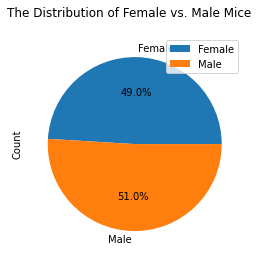

In [16]:
dip.plot(kind="pie", autopct="%1.1f%%", subplots=True, title = "The Distribution of Female vs. Male Mice")
plt.show()

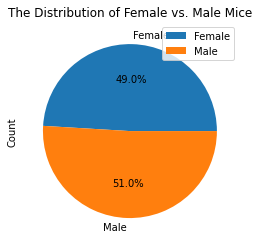

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(dip["Count"], autopct="%1.1f%%", labels=dip.index)
plt.legend(labels=dip.index, loc="best")
plt.ylabel("Count")
plt.title("The Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
bit = unf_clean.groupby("MouseID")
gatherdata = bit["Timepoint"].max()
gatherdata

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedata = pd.merge(gatherdata, unf_clean, on=("MouseID","Timepoint"))
mergedata

,Timepoint,DrugRegimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
MouseID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,48.710661,0
z578,45,Ramicane,Male,11,16,30.638696,0
z581,45,Infubinol,Female,24,25,62.754451,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
mergedata_isin = mergedata.loc[mergedata['DrugRegimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
date = mergedata_isin[["DrugRegimen","Tumor Volume (mm3)"]]
date

# Create empty list to fill with tumor vol data (for plotting)
    

,DrugRegimen,Tumor Volume (mm3)
MouseID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [20]:
date_cap = date.loc[date.DrugRegimen=="Capomulin"]
vol_cap = date_cap["Tumor Volume (mm3)"].sort_values(ascending=True)

date_ceft = date.loc[date.DrugRegimen=="Ceftamin"]
vol_ceft = date_ceft["Tumor Volume (mm3)"].sort_values(ascending=True)

date_ram = date.loc[date.DrugRegimen=="Ramicane"]
vol_ram = date_ram["Tumor Volume (mm3)"].sort_values(ascending=True)

date_inf = date.loc[date.DrugRegimen=="Infubinol"]
vol_inf = date_inf["Tumor Volume (mm3)"].sort_values(ascending=True)


ceft_index = vol_ceft.reset_index()["Tumor Volume (mm3)"]

cap_index = vol_cap.reset_index()["Tumor Volume (mm3)"]

ram_index = vol_ram.reset_index()["Tumor Volume (mm3)"]

inf_index = vol_inf.reset_index()["Tumor Volume (mm3)"]

four_drugs = pd.DataFrame({"Ceftamin" : ceft_index,
             "Capomulin" : cap_index,
             "Ramicane" : ram_index,
             "Infubinol" : inf_index})
four_drugs

,Ceftamin,Capomulin,Ramicane,Infubinol
0,45.000000,23.343598,22.050126,36.321346
1,45.000000,28.430964,29.128472,45.699331
2,45.000000,28.484033,30.276232,46.250112
3,45.000000,30.485985,30.564625,47.010364
4,46.784535,31.023923,30.638696,50.005138
5,47.784682,31.896238,31.095335,51.542431
6,48.722078,32.377357,31.560470,54.048608
7,52.925348,33.329098,32.978522,54.656549
8,55.742829,34.455298,33.397653,55.629428
9,56.057749,36.041047,33.562402,55.650681


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
quartile_cap = vol_cap.quantile([.25, .5, .75])
lowquart_cap = quartile_cap[.25]
medquart_cap = quartile_cap[.5]
upquart_cap = quartile_cap[.75]
iqrquart_cap = upquart_cap-lowquart_cap
lowbquart_cap = lowquart_cap - (1.5*iqrquart_cap)
upbquart_cap = upquart_cap + (1.5*iqrquart_cap)
max_cap = vol_cap.max()
min_cap = vol_cap.min()

quartile_ram = vol_ram.quantile([.25, .5, .75])
lowquart_ram = quartile_ram[.25]
medquart_ram = quartile_ram[.5]
upquart_ram = quartile_ram[.75]
iqrquart_ram = upquart_ram-lowquart_ram
lowbquart_ram = lowquart_ram - (1.5*iqrquart_ram)
upbquart_ram = upquart_ram + (1.5*iqrquart_ram)
max_ram = vol_ram.max()
min_ram = vol_ram.min()

quartile_inf = vol_inf.quantile([.25, .5, .75])
lowquart_inf = quartile_inf[.25]
medquart_inf = quartile_inf[.5]
upquart_inf = quartile_inf[.75]
iqrquart_inf = upquart_inf-lowquart_inf
lowbquart_inf = lowquart_inf - (1.5*iqrquart_inf)
upbquart_inf = upquart_inf + (1.5*iqrquart_inf)
max_inf = vol_inf.max()
min_inf = vol_inf.min()

quartile_ceft = vol_ceft.quantile([.25, .5, .75])
lowquart_ceft = quartile_ceft[.25]
medquart_ceft = quartile_ceft[.5]
upquart_ceft = quartile_ceft[.75]
iqrquart_ceft = upquart_ceft-lowquart_ceft
lowbquart_ceft = lowquart_ceft - (1.5*iqrquart_ceft)
upbquart_ceft = upquart_ceft + (1.5*iqrquart_ceft)
max_ceft = vol_ceft.max()
min_ceft = vol_ceft.min()

data = {"up" : [upquart_cap, upquart_ceft, upquart_inf, upquart_ram],
        "med": [medquart_cap, medquart_ceft, medquart_inf, medquart_ram],
        "low" : [lowquart_cap, lowquart_ceft, lowquart_inf, lowquart_ram,],
        "iqr" : [iqrquart_cap, iqrquart_ceft, iqrquart_inf, iqrquart_ram],
        "upb" : [upbquart_cap, upbquart_ceft, upbquart_inf, upbquart_ram],
        "lowb" : [lowbquart_cap, lowbquart_ceft, lowbquart_inf, lowbquart_ram],
        "max" : [max_cap, max_ceft, max_inf, max_ram],
        "min" : [min_cap, min_ceft, min_inf, min_ram]
}

outlier = pd.DataFrame(data, index = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
outlier

,up,med,low,iqr,upb,lowb,max,min
Capomulin,40.159220,38.125164,32.377357,7.781863,51.832015,20.704562,47.685963,23.343598
Ceftamin,64.299830,59.851956,48.722078,15.577752,87.666458,25.355450,68.923185,45.000000
Infubinol,65.525743,60.165180,54.048608,11.477135,82.741446,36.832905,72.226731,36.321346
Ramicane,40.659006,36.561652,31.560470,9.098537,54.306811,17.912664,45.220869,22.050126


In [22]:
print(f"The outliners for Capomulin could be higher than {round(upbquart_cap,2)} and lower than {round(lowbquart_cap,2)}")
print(f"The outliners for Ceftamin could be higher than {round(upbquart_ceft,2)} and lower than {round(lowbquart_ceft,2)}")
print(f"The outliners for Infubinol could be higher than {round(upbquart_inf,2)} and lower than {round(lowbquart_inf,2)}")
print(f"The outliners for Ramicane could be higher than {round(upbquart_ram,2)} and lower than {round(lowbquart_ram,2)}")

The outliners for Capomulin could be higher than 51.83 and lower than 20.7
The outliners for Ceftamin could be higher than 87.67 and lower than 25.36
The outliners for Infubinol could be higher than 82.74 and lower than 36.83
The outliners for Ramicane could be higher than 54.31 and lower than 17.91


In [23]:
vol_cap.loc[vol_cap <= lowbquart_cap].count()
vol_cap.loc[vol_cap >= upbquart_cap].count()
print(f"Number of lower outliers for Ceftamin: {vol_cap.loc[vol_cap <= lowbquart_cap].count()}")
print(f"Number of upper outliers for Ceftamin: {vol_cap.loc[vol_cap >= upbquart_cap].count()}")


vol_ceft.loc[vol_ceft <= lowbquart_ceft].count()
vol_ceft.loc[vol_ceft >= upbquart_ceft].count()
print(f"Number of lower outliers for Ceftamin: {vol_ceft.loc[vol_ceft <= lowbquart_ceft].count()}")
print(f"Number of upper outliers for Ceftamin: {vol_ceft.loc[vol_ceft >= upbquart_ceft].count()}")

vol_ram.loc[vol_ram <= lowbquart_ram].count()
vol_ram.loc[vol_ram >= upbquart_ram].count()
print(f"Number of lower outliers for Ramicane: {vol_ram.loc[vol_ram <= lowbquart_ram].count()}")
print(f"Number of upper outliers for Ramicane: {vol_ram.loc[vol_ram >= upbquart_ram].count()}")

vol_inf.loc[vol_inf <= lowbquart_inf].count()
vol_inf.loc[vol_inf >= upbquart_inf].count()
print(f"Number of lower outliers for Infubinol: {vol_inf.loc[vol_inf <= lowbquart_inf].count()}")
print(f"Number of upper outliers for Infubinol: {vol_inf.loc[vol_inf >= upbquart_inf].count()}")

Number of lower outliers for Ceftamin: 0
Number of upper outliers for Ceftamin: 0
Number of lower outliers for Ceftamin: 0
Number of upper outliers for Ceftamin: 0
Number of lower outliers for Ramicane: 0
Number of upper outliers for Ramicane: 0
Number of lower outliers for Infubinol: 1
Number of upper outliers for Infubinol: 0


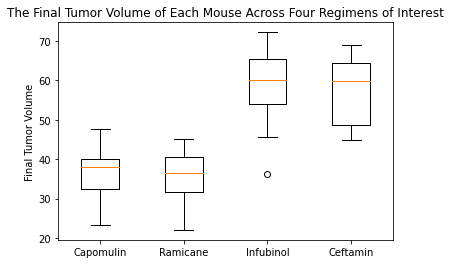

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
x = [1, 2, 3, 4]
ax1.boxplot([vol_cap, vol_ram, vol_inf, vol_ceft])
plt.xticks(x, ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume")
plt.title("The Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
plt.show()

## Line and Scatter Plots (Done)

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [26]:
bdb = unf_clean.loc[unf_clean.DrugRegimen=='Capomulin']
bdb

,DrugRegimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,0,45.000000,0
r157,Capomulin,Male,22,25,5,45.597064,0


In [27]:
one_mouse = bdb.loc[bdb.index=='s185']
one_mouse

,DrugRegimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
s185,Capomulin,Female,3,17,25,33.949940,0
s185,Capomulin,Female,3,17,30,32.959671,1
s185,Capomulin,Female,3,17,35,28.328531,1
s185,Capomulin,Female,3,17,40,25.472143,1


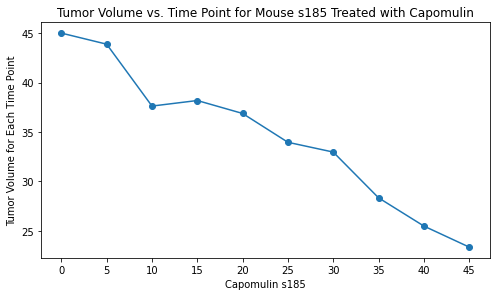

In [28]:
x_axis = np.arange(len(one_mouse))
tick_locations = list(x_axis)

plt.figure(figsize=(7,4))
plt.plot(x_axis, one_mouse["Tumor Volume (mm3)"], marker="o")
plt.show
plt.xlabel("Capomulin s185")
plt.ylabel("Tumor Volume for Each Time Point")

plt.xticks(tick_locations, one_mouse["Timepoint"])
plt.tight_layout()
plt.title("Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin")
plt.show()

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
dib = bdb.groupby(["MouseID","Weight (g)"])
gather_data = dib["Tumor Volume (mm3)"].mean()
gather_data

MouseID  Weight (g)
b128     22            41.963636
b742     21            40.083699
f966     17            36.505973
g288     19            41.990097
g316     22            44.613344
i557     24            44.805810
i738     20            39.141053
j119     23            44.465236
j246     21            43.216925
l509     21            44.434474
l897     19            42.507261
m601     17            34.847470
m957     19            39.049816
r157     25            45.798970
r554     17            36.509212
r944     25            43.367364
s185     17            34.559143
s710     23            42.803733
t565     17            39.328725
u364     17            39.887495
v923     21            41.581595
w150     23            41.384825
w914     21            41.352452
x401     15            36.182040
y793     17            38.506829
Name: Tumor Volume (mm3), dtype: float64

In [30]:
drop_data = gather_data.droplevel(0)
pd.DataFrame(drop_data)

,Tumor Volume (mm3)
Weight (g),
22,41.963636
21,40.083699
17,36.505973
19,41.990097
22,44.613344
24,44.805810
20,39.141053
23,44.465236
21,43.216925


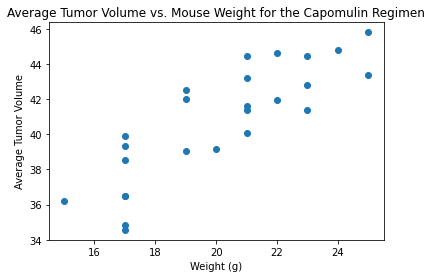

In [31]:
plt.scatter(pd.DataFrame(drop_data).index, pd.DataFrame(drop_data)["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(pd.DataFrame(drop_data).index, pd.DataFrame(drop_data)["Tumor Volume (mm3)"])
print("The correlation between mouse weight and average tumor volume is " + str(round(correlation[0],2)))

The correlation between mouse weight and average tumor volume is 0.84


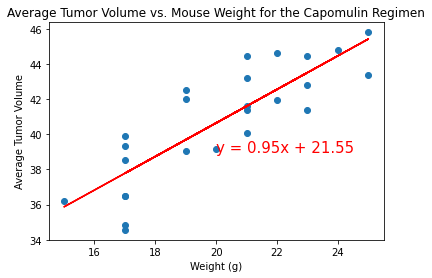

In [33]:
m, b = np.polyfit(pd.DataFrame(drop_data).index, pd.DataFrame(drop_data)["Tumor Volume (mm3)"], 1)
plt.plot(pd.DataFrame(drop_data).index, m*pd.DataFrame(drop_data).index + b, color="red")
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(pd.DataFrame(drop_data).index, pd.DataFrame(drop_data)["Tumor Volume (mm3)"])
plt.annotate(line_eq,(20,39),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()